# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [3]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

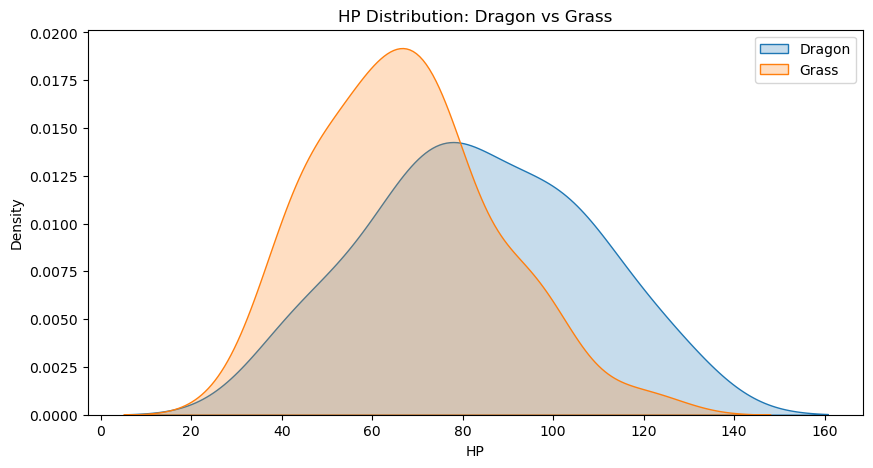

Shapiro Test for Dragon HP: ShapiroResult(statistic=0.9635281236696637, pvalue=0.3419890019248819)
Shapiro Test for Grass HP: ShapiroResult(statistic=0.9715915656401263, pvalue=0.11214356726520774)


In [10]:
# Filter Dragon dan Grass
dragon_hp = df[df['Type 1'] == 'Dragon']['HP']
grass_hp = df[df['Type 1'] == 'Grass']['HP']
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot distribusi
plt.figure(figsize=(10, 5))
sns.kdeplot(dragon_hp, label='Dragon', fill=True)
sns.kdeplot(grass_hp, label='Grass', fill=True)
plt.legend()
plt.title("HP Distribution: Dragon vs Grass")
plt.show()

# Uji normalitas Shapiro-Wilk
print("Shapiro Test for Dragon HP:", stats.shapiro(dragon_hp))
print("Shapiro Test for Grass HP:", stats.shapiro(grass_hp))

- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [12]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(dragon_hp, grass_hp, equal_var=False)  # unequal variances (Welch's t-test)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 3.3350
P-value: 0.0016


In [14]:
legendary = df[df['Legendary'] == True]
non_legendary = df[df['Legendary'] == False]
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
from scipy.stats import ttest_ind

# Loop untuk setiap kolom statistik
for col in stats_columns:
    t_stat, p_val = ttest_ind(legendary[col], non_legendary[col], equal_var=False)
    print(f"{col} -> T-stat: {t_stat:.4f}, P-value: {p_val:.4f}")

HP -> T-stat: 8.9814, P-value: 0.0000
Attack -> T-stat: 10.4381, P-value: 0.0000
Defense -> T-stat: 7.6371, P-value: 0.0000
Sp. Atk -> T-stat: 13.4174, P-value: 0.0000
Sp. Def -> T-stat: 10.0157, P-value: 0.0000
Speed -> T-stat: 11.4750, P-value: 0.0000


**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [22]:
import numpy as np

# Koordinat sekolah dan rumah sakit
school_coords = (-118, 34)
hospital_coords = (-122, 37)

# Fungsi Euclidean distance
def euclidean_distance(row, point):
    return np.sqrt((row['longitude'] - point[0])**2 + (row['latitude'] - point[1])**2)

# Hitung jarak dari tiap rumah ke sekolah dan rumah sakit
df['dist_school'] = df.apply(lambda row: euclidean_distance(row, school_coords), axis=1)
df['dist_hospital'] = df.apply(lambda row: euclidean_distance(row, hospital_coords), axis=1)

# Tandai rumah yang dekat (< 0.5 ke salah satu titik)
df['is_close'] = ((df['dist_school'] < 0.5) | (df['dist_hospital'] < 0.5))

In [24]:
from scipy.stats import ttest_ind

# Bagi data menjadi dua kelompok
close_houses = df[df['is_close'] == True]['median_house_value']
far_houses = df[df['is_close'] == False]['median_house_value']

# Lakukan Two Sample T-Test (tidak asumsi varians sama)
t_stat, p_val = ttest_ind(close_houses, far_houses, equal_var=False)

# Tampilkan hasil
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 37.9923
P-value: 0.0000
